In [1]:
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import plotly.io as pio
pio.renderers.default = 'iframe'

### Figura 8

In [2]:
df = pd.read_csv('susp_data_regions_rw.csv', index_col = 'data_iniSE')

df.index = pd.to_datetime(df.index)

df.head()

,casos_41007,casos_41008,casos_41009,casos_41010,casos_41020
data_iniSE,,,,,
2010-01-17,1.333333,2.333333,33.000000,11.333333,19.666667
2010-01-24,1.666667,3.333333,51.666667,11.000000,23.333333
2010-01-31,1.000000,2.666667,76.000000,10.333333,24.666667
2010-02-07,1.000000,2.666667,125.333333,9.000000,35.000000
2010-02-14,0.666667,2.333333,219.333333,12.000000,49.000000


In [3]:
df_pop = pd.read_csv('pop_22_region.csv')

df_pop.head()

,id_regional,pop22
0,41007,287428
1,41008,371437
2,41009,445448
3,41010,581990
4,41020,425785


In [4]:
for id_ in df_pop.id_regional.unique():

    df[f'inc_{id_}'] = 100000*df[f'casos_{id_}']/df_pop.loc[df_pop.id_regional == id_]['pop22'].values[0]
df.head()

,casos_41007,casos_41008,casos_41009,casos_41010,casos_41020,inc_41007,inc_41008,inc_41009,inc_41010,inc_41020
data_iniSE,,,,,,,,,,
2010-01-17,1.333333,2.333333,33.000000,11.333333,19.666667,0.463884,0.628191,7.408272,1.947342,4.618920
2010-01-24,1.666667,3.333333,51.666667,11.000000,23.333333,0.579855,0.897416,11.598810,1.890067,5.480074
2010-01-31,1.000000,2.666667,76.000000,10.333333,24.666667,0.347913,0.717932,17.061475,1.775517,5.793221
2010-02-07,1.000000,2.666667,125.333333,9.000000,35.000000,0.347913,0.717932,28.136468,1.546418,8.220111
2010-02-14,0.666667,2.333333,219.333333,12.000000,49.000000,0.231942,0.628191,49.238819,2.061891,11.508156


In [5]:
df_inc = df[['inc_41007', 'inc_41008', 'inc_41009', 'inc_41010', 'inc_41020']].reset_index()

df_inc

,data_iniSE,inc_41007,inc_41008,inc_41009,inc_41010,inc_41020
0,2010-01-17,0.463884,0.628191,7.408272,1.947342,4.618920
1,2010-01-24,0.579855,0.897416,11.598810,1.890067,5.480074
2,2010-01-31,0.347913,0.717932,17.061475,1.775517,5.793221
3,2010-02-07,0.347913,0.717932,28.136468,1.546418,8.220111
4,2010-02-14,0.231942,0.628191,49.238819,2.061891,11.508156
...,...,...,...,...,...,...
778,2024-12-15,11.945020,23.602029,67.273097,48.397166,41.961710
779,2024-12-22,11.481136,18.486760,56.048443,47.022572,38.125658
780,2024-12-29,13.568615,18.486760,49.687805,46.678923,34.211319
781,2025-01-05,13.568615,19.473917,50.885101,47.652594,35.933628


In [6]:
df_inc_m = df_inc.melt(id_vars=['data_iniSE'], var_name='region', value_name='inc')

valores_a_substituir = ['inc_41007', 'inc_41008', 'inc_41009', 'inc_41010', 'inc_41020']
novos_valores = ['Pato Branco', 'Francisco Beltrão', 'Foz do Iguaçu', 'Cascavel', 'Toledo']

df_inc_m[['region']]  = df_inc_m[['region']].replace(valores_a_substituir, novos_valores)

df_inc_m

,data_iniSE,region,inc
0,2010-01-17,Pato Branco,0.463884
1,2010-01-24,Pato Branco,0.579855
2,2010-01-31,Pato Branco,0.347913
3,2010-02-07,Pato Branco,0.347913
4,2010-02-14,Pato Branco,0.231942
...,...,...,...
3910,2024-12-15,Toledo,41.961710
3911,2024-12-22,Toledo,38.125658
3912,2024-12-29,Toledo,34.211319
3913,2025-01-05,Toledo,35.933628


In [7]:
df_inc_m_ = df_inc_m.loc[df_inc_m.data_iniSE >= '2019-01-01']
df_inc_m_.head()

,data_iniSE,region,inc
468,2019-01-06,Pato Branco,0.811798
469,2019-01-13,Pato Branco,1.275682
470,2019-01-20,Pato Branco,1.855537
471,2019-01-27,Pato Branco,2.551364
472,2019-02-03,Pato Branco,2.203450


In [8]:
fig = go.Figure(data=go.Heatmap(
        z=df_inc_m_.inc,
        x=df_inc_m_.data_iniSE,
        y=df_inc_m_.region,
        colorscale='Reds',
        zmin = 0,    
        zmax = 300,
        colorbar=dict(title='Incidência por 100 mil habitantes',
                     titleside='right'),
                        ))
fig.update_layout(
    xaxis_title="Data",
    yaxis_title="Regional de saúde",
    #title='Incidência por 100 mil habitantes',
    xaxis_nticks=36,
    yaxis_nticks=36)

fig.update_layout(yaxis_tickformat = '%.f',
    width=750,
    height=600)

#fig.update_layout(coloraxis_colorbar=dict(title='Incidência por 100 mil habitantes'))
fig.write_image("../figures/inc_100_region.png")

fig.show()

### Figure 09: 

In [9]:
df= pd.read_csv('dist.csv', sep = ';', index_col = 'origem')

df.head()

,Cascavel,Foz do Iguaçu,Francisco Beltrão,Pato Branco,Toledo
origem,,,,,
Cascavel,0.0,120.0,146,248.0,106.0
Foz do Iguaçu,120.0,0.0,206,329.0,142.0
Francisco Beltrão,146.0,206.0,0,151.0,212.0
Pato Branco,248.0,329.0,151,0.0,341.0
Toledo,106.0,142.0,212,341.0,0.0


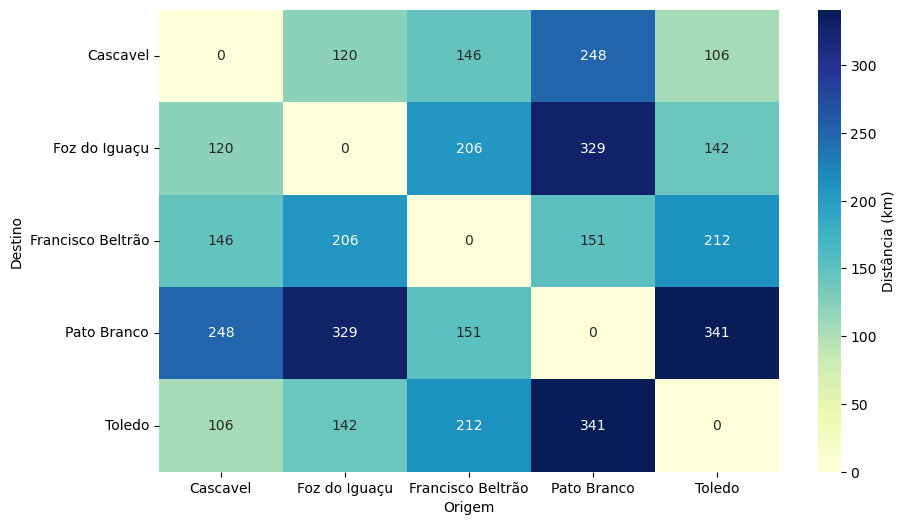

In [10]:
heatmap_data = df

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f',  cmap='YlGnBu', cbar_kws={'label': 'Distância (km)'})

# Add labels and title
#plt.title('Mapa de calor da distância entre o centróide das regionais')
plt.xlabel('Origem')
plt.ylabel('Destino')

plt.savefig('../figures/heatmap_dist_region.png', dpi = 300, bbox_inches = 'tight')